In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
file_path = '/content/Titanic.csv'
df = pd.read_csv(file_path)

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


###Handle Missing Values

In [5]:
# Replace missing values with zero
df_filled = df.fillna(0)

###Removing Duplicates

In [8]:
# Check for duplicate rows in the DataFrame
duplicate_rows = df[df.duplicated()]

duplicate_rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### Calculate descriptive statistics for numerical variables

In [9]:
summary_statistics = df.describe()

In [10]:
summary_statistics

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<Figure size 2000x1600 with 0 Axes>

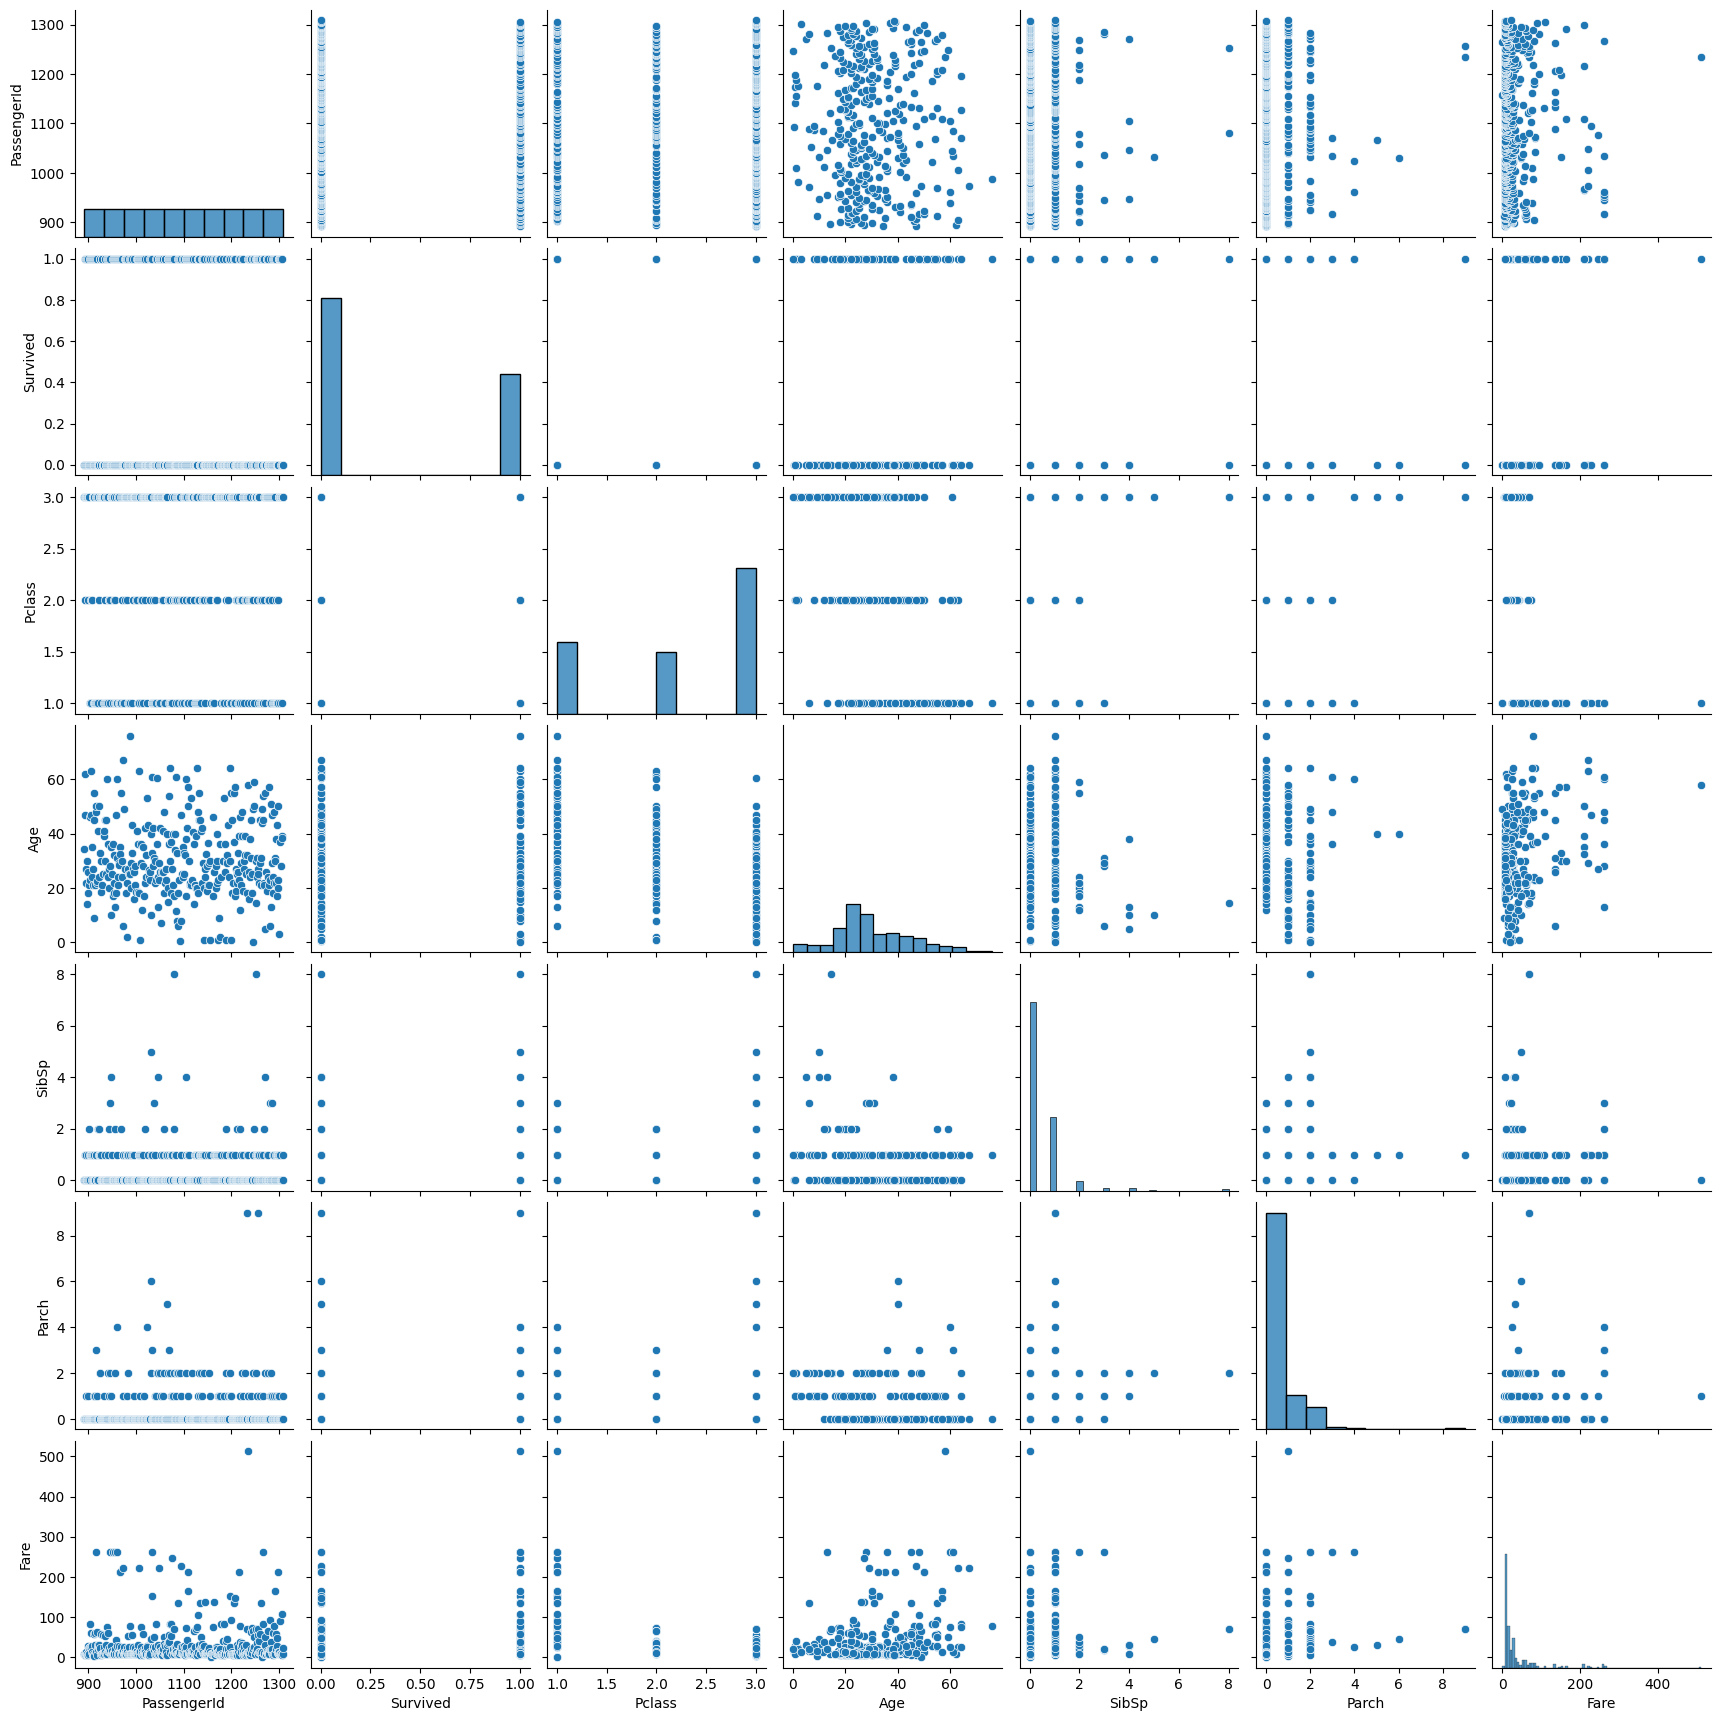

In [16]:
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(20, 16))
sns.pairplot(numeric_df)
plt.show()


### Calculate correlation matrix

<ipython-input-18-a0a73d86d920>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


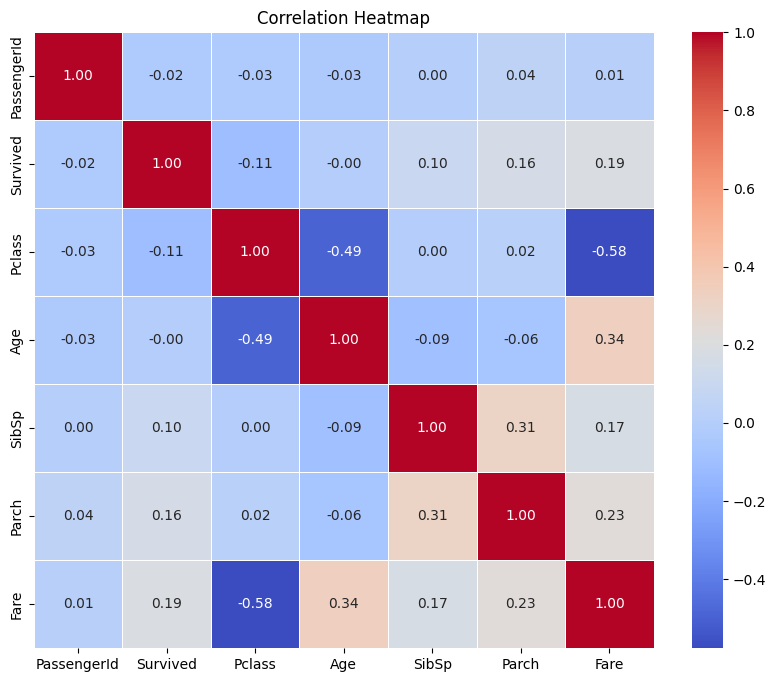

In [18]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


###Analyzing Patterns and Hypotheses Testing in the Titanic Dataset

In [20]:
# Example hypothesis testing: Difference in survival rates between males and females
male_survival = df[df['Sex'] == 'male']['Survived']
female_survival = df[df['Sex'] == 'female']['Survived']

# Perform t-test for independent samples
t_statistic, p_value = stats.ttest_ind(male_survival, female_survival)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Interpretation based on the p-value
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in survival rates between males and females.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in survival rates between males and females.")



T-Statistic: -inf
P-Value: 0.0
Reject the null hypothesis. There is a significant difference in survival rates between males and females.
